<a href="https://colab.research.google.com/github/AlamProgram/Machine_Learning_Project/blob/main/Cleaning_SalesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1 : Sales Forecasting**

## *Prepare Dataset*

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#read dataset from gdrive
from google.colab import drive
drive.mount('/content/drive')

url = ('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 1: Sales Forecasting/store5.csv')
df = pd.read_csv(url)

df

Mounted at /content/drive


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.000,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.000,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.000,0,NaN
4,1456,2013-01-01,5,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
55567,3000586,2017-08-15,5,POULTRY,241.011,1,47.57
55568,3000587,2017-08-15,5,PREPARED FOODS,52.121,0,47.57
55569,3000588,2017-08-15,5,PRODUCE,1357.823,4,47.57
55570,3000589,2017-08-15,5,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.57


In [2]:
#Cek Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB


In [3]:
# If you need 'date' as a column again:
df = df.reset_index()

#Pastikan tanggal dalam format datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [4]:
#Cek Tipe Data setelah ubah tipe data menjadi datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55572 entries, 2013-01-01 to 2017-08-15
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        55572 non-null  int64  
 1   id           55572 non-null  int64  
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 3.4+ MB


# **Step-Step of Analysis**

## **1. Preprocessing Data**



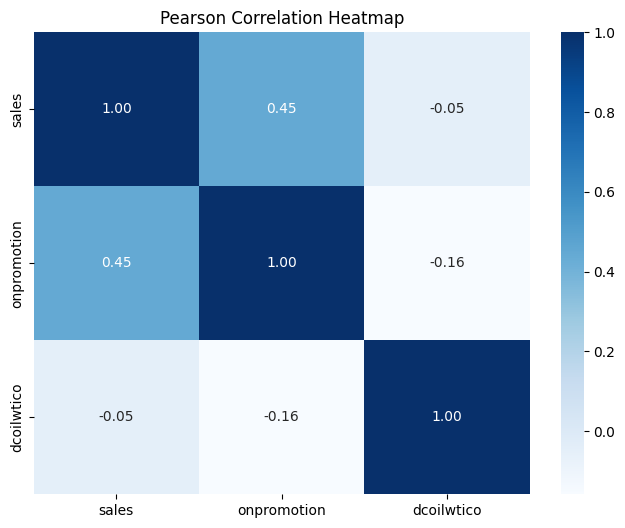

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom 'date' dalam tipe datetime
#df['date'] = pd.to_datetime(df['date'])

# Memilih kolom numerik saja
numeric_cols = ['sales', 'onpromotion', 'dcoilwtico']

# Drop missing values (jika ada) agar korelasi dapat dihitung
df_numeric = df[numeric_cols].dropna()

# Menghitung matriks korelasi Pearson
correlation_matrix = df_numeric.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

### *a. Checking Missing Value*

In [6]:
# Menghitung Jumlah Missing Value (NaN) per kolom
sum_missing_value = df.isna().sum()

# Validasi kolom missing value
val_columns_missing = sum_missing_value[sum_missing_value > 0]
print("Kolom nilai missing value:")
print(val_columns_missing)

# Menampilkan persentase missing value per kolom
df_percentage_miss_column = (val_columns_missing / len(df)) * 100
print("\nKolom percentage missing value:")
print(df_percentage_miss_column)

Kolom nilai missing value:
dcoilwtico    17193
dtype: int64

Kolom percentage missing value:
dcoilwtico    30.938242
dtype: float64


In [7]:
# Menggunakan metode interpolasi spline untuk handle missing values
df['dcoilwtico_interpolate'] = (df['dcoilwtico'].interpolate(method='spline', order=3).fillna(method='bfill'))

df.head()

<ipython-input-7-2da5cc0df859>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['dcoilwtico_interpolate'] = (df['dcoilwtico'].interpolate(method='spline', order=3).fillna(method='bfill'))


,index,id,store_nbr,family,sales,onpromotion,dcoilwtico,dcoilwtico_interpolate
date,,,,,,,,
2013-01-01,0,1452,5,AUTOMOTIVE,0.0,0,NaN,93.14
2013-01-01,1,1453,5,BABY CARE,0.0,0,NaN,93.14
2013-01-01,2,1454,5,BEAUTY,0.0,0,NaN,93.14
2013-01-01,3,1455,5,BEVERAGES,0.0,0,NaN,93.14
2013-01-01,4,1456,5,BOOKS,0.0,0,NaN,93.14


In [8]:
# Cek apakah ada NaN setelah interpolasi
print(df.isna().sum())

index                         0
id                            0
store_nbr                     0
family                        0
sales                         0
onpromotion                   0
dcoilwtico                17193
dcoilwtico_interpolate        0
dtype: int64


In [9]:
# Introduce missing values
np.random.seed(0)
missing_idx = np.random.choice(df.index, size=15, replace=False)
df.loc[missing_idx, 'dcoilwtico'] = np.nan

<ipython-input-10-247ae2827d7f>:14: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='spline', order=3).fillna(method='bfill')
<ipython-input-10-247ae2827d7f>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolated = df.interpolate(method='spline', order=3).fillna(method='bfill')


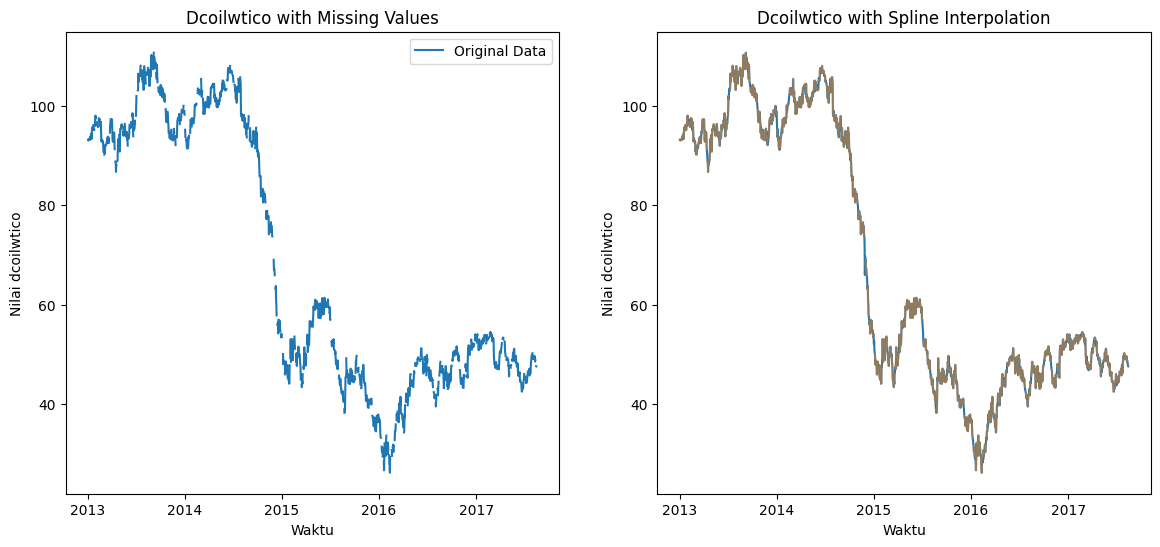

In [10]:
# Plot the data with missing values
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(df.index, df['dcoilwtico'], label='Original Data', linestyle='-')
plt.legend()
plt.title('Dcoilwtico with Missing Values')
plt.xlabel('Waktu')
plt.ylabel('Nilai dcoilwtico')


# Plot the interpolated data
plt.subplot(1, 2, 2)
# Use spline interpolation to fill in missing values
df_interpolated = df.interpolate(method='spline', order=3).fillna(method='bfill')
missing_idx = df_interpolated.index[df_interpolated['dcoilwtico'].isna()]

# Plot the interpolated data
plt.plot(df_interpolated.index, df_interpolated['dcoilwtico'], label='Spline Interpolation')
plt.plot(df.index, df['dcoilwtico'], label='Original Data', alpha=0.5)
plt.scatter(missing_idx, df_interpolated.loc[missing_idx, 'dcoilwtico'], label='Interpolated Values', color='green')
plt.title('Dcoilwtico with Spline Interpolation')
plt.xlabel('Waktu')
plt.ylabel('Nilai dcoilwtico')
plt.show()

### *b. Checking Missing Date*

#### Checking Missing Date - All Family

In [11]:
df = df.reset_index()  # Resets the index, bringing 'date' back as a column
df = df[['date','store_nbr','family','sales','onpromotion','dcoilwtico']]

In [12]:
# Buat rentang tanggal lengkap berdasarkan min & max
full_date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')

# Cari tanggal yang hilang
missing_dates = full_date_range.difference(df['date'])
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

In [13]:
missing_dates[missing_dates.dayofyear == 1]  # Cek Tahun Baru

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [14]:
missing_dates[missing_dates.dayofyear == 364]

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [15]:
# Set index ke 'date' dan reindex dengan full_date_range
df = df.drop_duplicates(subset=['date','family'], keep='first')
# df = df.set_index('date').reindex(full_date_range).reset_index()

# Pastikan kolom tetap bernama 'date'
df.rename(columns={'index': 'date'}, inplace=True)

# Isi sales dan onpromotion dengan 0, tetapi dcoilwtico tetap NaN
df[['sales', 'onpromotion']] = df[['sales', 'onpromotion']].fillna(0)

In [16]:
df

,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,2013-01-01,5,BABY CARE,0.000,0,NaN
2,2013-01-01,5,BEAUTY,0.000,0,NaN
3,2013-01-01,5,BEVERAGES,0.000,0,NaN
4,2013-01-01,5,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...
55567,2017-08-15,5,POULTRY,241.011,1,47.57
55568,2017-08-15,5,PREPARED FOODS,52.121,0,47.57
55569,2017-08-15,5,PRODUCE,1357.823,4,47.57
55570,2017-08-15,5,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.57


In [17]:
df_store_new = df [['date','store_nbr','family','sales','onpromotion','dcoilwtico']]
df_store_new

,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,2013-01-01,5,BABY CARE,0.000,0,NaN
2,2013-01-01,5,BEAUTY,0.000,0,NaN
3,2013-01-01,5,BEVERAGES,0.000,0,NaN
4,2013-01-01,5,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...
55567,2017-08-15,5,POULTRY,241.011,1,47.57
55568,2017-08-15,5,PREPARED FOODS,52.121,0,47.57
55569,2017-08-15,5,PRODUCE,1357.823,4,47.57
55570,2017-08-15,5,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.57


In [18]:
# Pastikan kolom 'date' bertipe datetime pada df_store_new
df_store_new['date'] = pd.to_datetime(df_store_new['date'])

# Buat rentang tanggal lengkap berdasarkan min & max pada df_store_new
full_date_range = pd.date_range(start=df_store_new['date'].min(), end=df_store_new['date'].max(), freq='D')

# Membuat dataframe dengan kombinasi unik dari family dan store_nbr
store_family_combinations = df_store_new[['store_nbr', 'family']].drop_duplicates()

# Daftar untuk menyimpan baris dengan tanggal yang hilang
missing_data = []

for _, row in store_family_combinations.iterrows():
    store_nbr = row['store_nbr']
    family = row['family']

    # Filter data untuk kombinasi store_nbr dan family tertentu
    family_data = df_store_new[(df_store_new['store_nbr'] == store_nbr) & (df_store_new['family'] == family)]

    # Cari tanggal yang hilang untuk kombinasi ini
    missing_dates = full_date_range.difference(family_data['date'])

    # Simpan hasilnya dalam bentuk data baru
    for missing_date in missing_dates:
        missing_data.append({
            'store_nbr': store_nbr,
            'family': family,
            'date': missing_date,
            'sales': 0,  # Menetapkan nilai default untuk sales
            'onpromotion': 0,  # Nilai default untuk onpromotion
            'dcoilwtico': None  # Nilai default untuk dcoilwtico
        })

# Buat DataFrame untuk missing data
missing_df = pd.DataFrame(missing_data)

# Gabungkan missing data ke df_store_new
df_store_full = pd.concat([df_store_new, missing_df], ignore_index=True)

# Urutkan berdasarkan store_nbr, family, dan date
df_store_full = df_store_full.sort_values(by=['store_nbr', 'family', 'date']).reset_index(drop=True)

# Menampilkan hasil
df_store_full

<ipython-input-18-7a93ec5b48e4>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_store_full = pd.concat([df_store_new, missing_df], ignore_index=True)


,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,2013-01-02,5,AUTOMOTIVE,6.000,0,93.14
2,2013-01-03,5,AUTOMOTIVE,4.000,0,92.97
3,2013-01-04,5,AUTOMOTIVE,6.000,0,93.12
4,2013-01-05,5,AUTOMOTIVE,4.000,0,NaN
...,...,...,...,...,...,...
55699,2017-08-11,5,SEAFOOD,8.402,4,48.81
55700,2017-08-12,5,SEAFOOD,7.320,0,NaN
55701,2017-08-13,5,SEAFOOD,11.642,0,NaN
55702,2017-08-14,5,SEAFOOD,11.694,0,47.59


In [19]:
# Filter hanya bulan Desember
df_december = df[df['date'].dt.month == 12]
df_december.head(60)

,date,store_nbr,family,sales,onpromotion,dcoilwtico
11022,2013-12-01,5,AUTOMOTIVE,16.000,0,NaN
11023,2013-12-01,5,BABY CARE,0.000,0,NaN
11024,2013-12-01,5,BEAUTY,4.000,0,NaN
11025,2013-12-01,5,BEVERAGES,1304.000,0,NaN
11026,2013-12-01,5,BOOKS,0.000,0,NaN
11027,2013-12-01,5,BREAD/BAKERY,527.463,0,NaN
11028,2013-12-01,5,CELEBRATION,0.000,0,NaN
11029,2013-12-01,5,CLEANING,1551.000,0,NaN
11030,2013-12-01,5,DAIRY,866.000,0,NaN
11031,2013-12-01,5,DELI,347.625,0,NaN


In [21]:
import numpy as np

# Isi missing store_nbr dengan 5 dan family
df['store_nbr'] = df['store_nbr'].fillna(5).astype(int)
df['family'] = df['family'].fillna(method='bfill')
df

<ipython-input-21-4ed7c2f23f80>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['family'] = df['family'].fillna(method='bfill')


,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,2013-01-01,5,BABY CARE,0.000,0,NaN
2,2013-01-01,5,BEAUTY,0.000,0,NaN
3,2013-01-01,5,BEVERAGES,0.000,0,NaN
4,2013-01-01,5,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...
55567,2017-08-15,5,POULTRY,241.011,1,47.57
55568,2017-08-15,5,PREPARED FOODS,52.121,0,47.57
55569,2017-08-15,5,PRODUCE,1357.823,4,47.57
55570,2017-08-15,5,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.57


####Checking Missing Date - Family CLEANING

In [22]:
# Filter hanya data dengan family "CLEANING"
df_cleaning = df[df['family']=='CLEANING']
df_cleaning.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico
7,2013-01-01,5,CLEANING,0.0,0,NaN
40,2013-01-02,5,CLEANING,1810.0,0,93.14
73,2013-01-03,5,CLEANING,1305.0,0,92.97
106,2013-01-04,5,CLEANING,1159.0,0,93.12
139,2013-01-05,5,CLEANING,1257.0,0,NaN


In [23]:
df_cleaning['date'] = pd.to_datetime(df_cleaning['date'])

<ipython-input-23-616cde110801>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaning['date'] = pd.to_datetime(df_cleaning['date'])


In [28]:
# memilih hanya kolom 'date','store_nbr','family','sales','onpromotion','dcoilwtico'
df_cleaning = df_cleaning[['date','store_nbr','family','sales','onpromotion','dcoilwtico']]

In [29]:
# Buat rentang tanggal lengkap berdasarkan min & max
# pd.date_rage(start =x, end=y) ==> kode untuk mencari rentang tanggal
# freq = 'D' ==> memilih frekuensi data, D = day
full_date_range_cln = pd.date_range(start=df_cleaning['date'].min(), end=df_cleaning['date'].max(), freq='D')




In [30]:
# Cari tanggal yang hilang
missing_dates_cln = full_date_range_cln.difference(df_cleaning['date'])
missing_dates_cln

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

In [31]:
# Filter hanya bulan Desember
df_december_cln = df_cleaning[df_cleaning['date'].dt.month == 12]
df_december_cln.head(60)

,date,store_nbr,family,sales,onpromotion,dcoilwtico
11029,2013-12-01,5,CLEANING,1551.0,0,NaN
11062,2013-12-02,5,CLEANING,906.0,0,93.61
11095,2013-12-03,5,CLEANING,867.0,0,95.83
11128,2013-12-04,5,CLEANING,966.0,0,96.97
11161,2013-12-05,5,CLEANING,911.0,0,97.14
11194,2013-12-06,5,CLEANING,809.0,0,97.48
11227,2013-12-07,5,CLEANING,991.0,0,NaN
11260,2013-12-08,5,CLEANING,1286.0,0,NaN
11293,2013-12-09,5,CLEANING,933.0,0,97.10
11326,2013-12-10,5,CLEANING,718.0,0,98.32


In [32]:
missing_dates_cln[missing_dates_cln.dayofyear == 1]  # Cek Tahun Baru
# missing_dates[],  memilih data dari variabel missingdate dengan kriteria berikut:
# .dayofyear == 1, .dayofyear ==> mengubah isi variabel menjadi urutan hari dalam 1 tahun (1-365)
# == 1, yang nilainya 1 ( 1 januari)
# hasil menunjukkan tidak ada

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [33]:
missing_dates_cln[missing_dates_cln.dayofyear == 359]
# hasilnya ada misisng date di hari natal

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25'], dtype='datetime64[ns]', freq=None)

In [34]:
# Set index ke 'date' dan reindex dengan full_date_range
df_cleaning = df_cleaning.set_index('date').reindex(full_date_range_cln).reset_index()

# Pastikan kolom tetap bernama 'date'
df_cleaning.rename(columns={'index': 'date'}, inplace=True)

# Isi sales dan onpromotion dengan 0, tetapi dcoilwtico tetap NaN
df_cleaning[['sales', 'onpromotion']] = df_cleaning[['sales', 'onpromotion']].fillna(0)

In [35]:
df_cleaning

,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,5.0,CLEANING,0.0,0.0,NaN
1,2013-01-02,5.0,CLEANING,1810.0,0.0,93.14
2,2013-01-03,5.0,CLEANING,1305.0,0.0,92.97
3,2013-01-04,5.0,CLEANING,1159.0,0.0,93.12
4,2013-01-05,5.0,CLEANING,1257.0,0.0,NaN
...,...,...,...,...,...,...
1683,2017-08-11,5.0,CLEANING,775.0,16.0,48.81
1684,2017-08-12,5.0,CLEANING,686.0,14.0,NaN
1685,2017-08-13,5.0,CLEANING,927.0,16.0,NaN
1686,2017-08-14,5.0,CLEANING,676.0,10.0,47.59


In [36]:
# Filter hanya bulan Desember
df_december_cln = df_cleaning[df_cleaning['date'].dt.month == 12]
df_december_cln.head(60)
# di hari natal, baris berisi store_nbr dan family masih berisi Nan

,date,store_nbr,family,sales,onpromotion,dcoilwtico
334,2013-12-01,5.0,CLEANING,1551.0,0.0,NaN
335,2013-12-02,5.0,CLEANING,906.0,0.0,93.61
336,2013-12-03,5.0,CLEANING,867.0,0.0,95.83
337,2013-12-04,5.0,CLEANING,966.0,0.0,96.97
338,2013-12-05,5.0,CLEANING,911.0,0.0,97.14
339,2013-12-06,5.0,CLEANING,809.0,0.0,97.48
340,2013-12-07,5.0,CLEANING,991.0,0.0,NaN
341,2013-12-08,5.0,CLEANING,1286.0,0.0,NaN
342,2013-12-09,5.0,CLEANING,933.0,0.0,97.10
343,2013-12-10,5.0,CLEANING,718.0,0.0,98.32


In [37]:
# Isi missing store_nbr dengan 5 dan family dengan "CLEANING"
df_cleaning['store_nbr'] = df_cleaning['store_nbr'].fillna(5).astype(int)
df_cleaning['family'] = df_cleaning['family'].fillna("CLEANING")
df_cleaning

,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,5,CLEANING,0.0,0.0,NaN
1,2013-01-02,5,CLEANING,1810.0,0.0,93.14
2,2013-01-03,5,CLEANING,1305.0,0.0,92.97
3,2013-01-04,5,CLEANING,1159.0,0.0,93.12
4,2013-01-05,5,CLEANING,1257.0,0.0,NaN
...,...,...,...,...,...,...
1683,2017-08-11,5,CLEANING,775.0,16.0,48.81
1684,2017-08-12,5,CLEANING,686.0,14.0,NaN
1685,2017-08-13,5,CLEANING,927.0,16.0,NaN
1686,2017-08-14,5,CLEANING,676.0,10.0,47.59


In [38]:
# Filter hanya bulan Desember
df_december_cln = df_cleaning[df_cleaning['date'].dt.month == 12]
df_december_cln.head(60)

,date,store_nbr,family,sales,onpromotion,dcoilwtico
334,2013-12-01,5,CLEANING,1551.0,0.0,NaN
335,2013-12-02,5,CLEANING,906.0,0.0,93.61
336,2013-12-03,5,CLEANING,867.0,0.0,95.83
337,2013-12-04,5,CLEANING,966.0,0.0,96.97
338,2013-12-05,5,CLEANING,911.0,0.0,97.14
339,2013-12-06,5,CLEANING,809.0,0.0,97.48
340,2013-12-07,5,CLEANING,991.0,0.0,NaN
341,2013-12-08,5,CLEANING,1286.0,0.0,NaN
342,2013-12-09,5,CLEANING,933.0,0.0,97.10
343,2013-12-10,5,CLEANING,718.0,0.0,98.32


In [ ]:
# Buat rentang tanggal lengkap berdasarkan min & max
full_date_range_cln = pd.date_range(start=df_cleaning['date'].min(), end=df_cleaning['date'].max(), freq='D')

# Cari tanggal yang hilang
missing_dates_cln = full_date_range_cln.difference(df_cleaning['date'])
missing_dates_cln

#sudah tidak ada tanggal yg kosong

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [39]:
# isi buat dcoil hasil interpolasi polinomial
df_cleaning['dcoilwtico_interpolate'] = (
    df_cleaning['dcoilwtico']
    .interpolate(method='polynomial', order=2)
    .fillna(method='bfill')  # Mengisi NaN awal dengan nilai pertama yang valid
)

<ipython-input-39-0828dfcf3226>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')  # Mengisi NaN awal dengan nilai pertama yang valid


In [40]:
# Cek apakah ada NaN setelah interpolasi
print(df_cleaning.isna().sum())

date                        0
store_nbr                   0
family                      0
sales                       0
onpromotion                 0
dcoilwtico                535
dcoilwtico_interpolate      0
dtype: int64


In [41]:
df_cleaning.tail(40)

,date,store_nbr,family,sales,onpromotion,dcoilwtico,dcoilwtico_interpolate
1648,2017-07-07,5,CLEANING,781.0,41.0,44.25,44.250000
1649,2017-07-08,5,CLEANING,1155.0,42.0,NaN,43.579635
1650,2017-07-09,5,CLEANING,1106.0,39.0,NaN,43.846343
1651,2017-07-10,5,CLEANING,916.0,43.0,44.40,44.400000
1652,2017-07-11,5,CLEANING,722.0,34.0,45.06,45.060000
1653,2017-07-12,5,CLEANING,1016.0,32.0,45.48,45.480000
1654,2017-07-13,5,CLEANING,932.0,23.0,46.06,46.060000
1655,2017-07-14,5,CLEANING,961.0,17.0,46.53,46.530000
1656,2017-07-15,5,CLEANING,1022.0,23.0,NaN,46.522563
1657,2017-07-16,5,CLEANING,1110.0,21.0,NaN,46.107458


## **2. Exploratory Data Analysis (EDA)**

### a. Checking Stationarity (It must be stationer)

In [42]:
from statsmodels.tsa.stattools import adfuller

# Fungsi untuk ADF Test dan menampilkan hasil lengkap
def adf_test(series, series_name="Time Series"):
    result = adfuller(series.dropna())
    print(f"ADF Test for {series_name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")
    if result[1] < 0.05:
        print("=> Data is stationary (reject H0)")
    else:
        print("=> Data is non-stationary (fail to reject H0)")

# Contoh ADF test untuk sales dan onpromotion
adf_test(df['sales'], "Sales")
adf_test(df['onpromotion'], "OnPromotion")

ADF Test for Sales:
ADF Statistic: -18.5331
p-value: 0.0000
Critical Values:
   1%: -3.4305
   5%: -2.8616
   10%: -2.5668
=> Data is stationary (reject H0)
ADF Test for OnPromotion:
ADF Statistic: -12.4370
p-value: 0.0000
Critical Values:
   1%: -3.4305
   5%: -2.8616
   10%: -2.5668
=> Data is stationary (reject H0)


In [51]:
df_cleaning['onpromotion_diff'] = df_cleaning['onpromotion'].diff()

In [52]:
df_cleaning

,date,store_nbr,family,sales,onpromotion,dcoilwtico,dcoilwtico_interpolate,onpromotion_diff
0,2013-01-01,5,CLEANING,0.0,0.0,NaN,93.140000,NaN
1,2013-01-02,5,CLEANING,1810.0,0.0,93.14,93.140000,0.0
2,2013-01-03,5,CLEANING,1305.0,0.0,92.97,92.970000,0.0
3,2013-01-04,5,CLEANING,1159.0,0.0,93.12,93.120000,0.0
4,2013-01-05,5,CLEANING,1257.0,0.0,NaN,93.205338,0.0
...,...,...,...,...,...,...,...,...
1683,2017-08-11,5,CLEANING,775.0,16.0,48.81,48.810000,2.0
1684,2017-08-12,5,CLEANING,686.0,14.0,NaN,48.717426,-2.0
1685,2017-08-13,5,CLEANING,927.0,16.0,NaN,48.020802,2.0
1686,2017-08-14,5,CLEANING,676.0,10.0,47.59,47.590000,-6.0


In [53]:
# Uji ADF untuk mengecek stasioneritas
result = adfuller(df_cleaning['onpromotion_diff'].dropna())

# Print hasil ADF Test
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Jika p-value > 0.05, berarti tidak stasioner
if result[1] > 0.05:
    print("Data tidak stasioner, perlu differencing.")
else:
    print("Data sudah stasioner.")

ADF Statistic: -11.221804938016236
p-value: 2.004937264722181e-20
Data sudah stasioner.


In [54]:
# Ensure 'date' column is of datetime type
df_cleaning['date'] = pd.to_datetime(df_cleaning['date'])

# Buat rentang tanggal lengkap berdasarkan min & max
full_date_range = pd.date_range(start=df_cleaning['date'].min(), end=df_cleaning['date'].max(), freq='D')

# Cari tanggal yang hilang
missing_dates = full_date_range.difference(df_cleaning['date'])
missing_dates

#hasilnya sudah tidak ada tanggal yg hilang

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

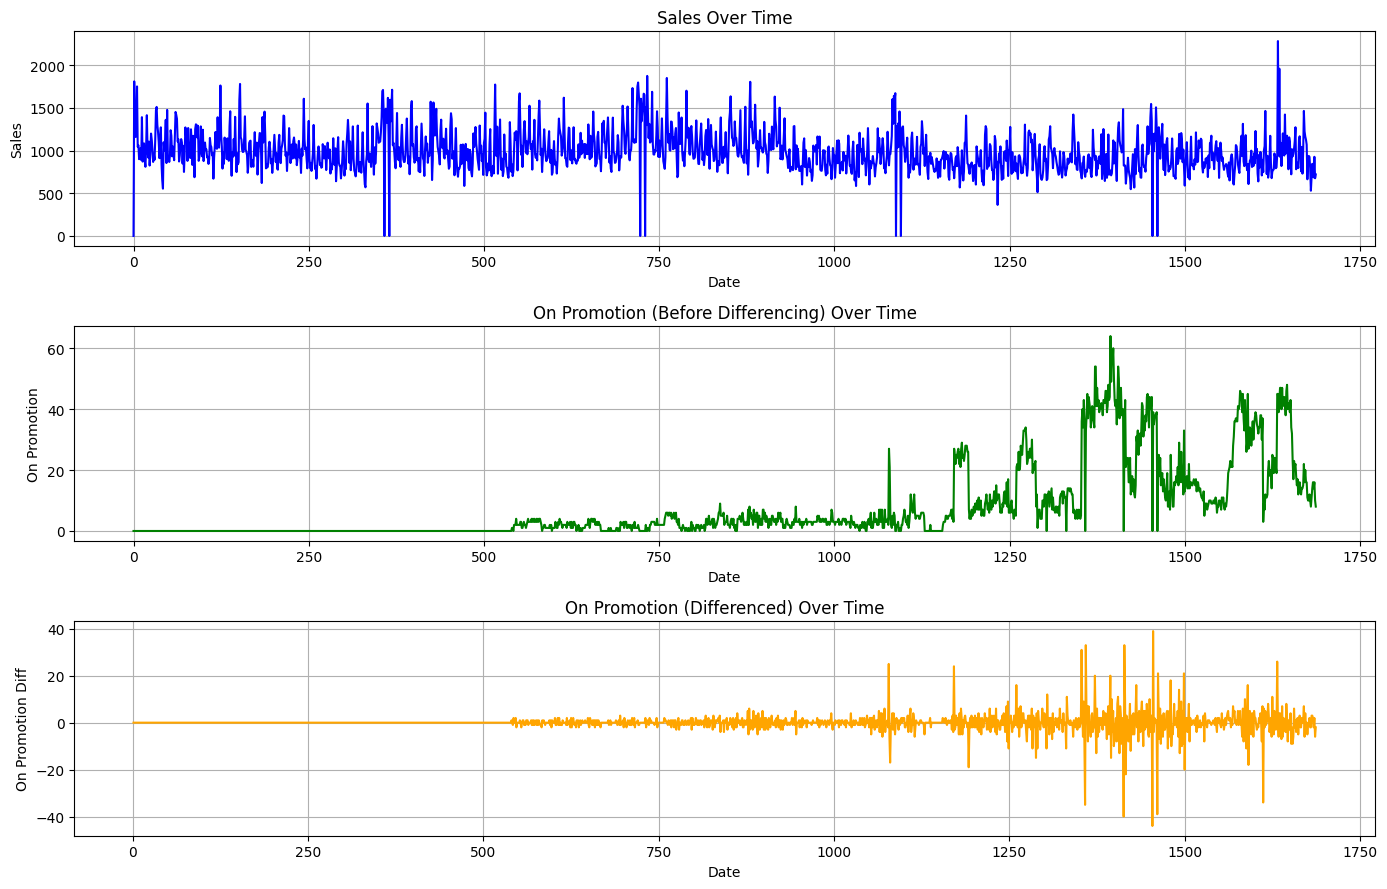

In [55]:
plt.figure(figsize=(14, 9))

# Plot Sales
plt.subplot(3, 1, 1)
plt.plot(df_cleaning.index, df_cleaning['sales'], color='blue')
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)

# Plot On Promotion (Before Differencing)
plt.subplot(3, 1, 2)
plt.plot(df_cleaning.index, df_cleaning['onpromotion'], color='green')
plt.title("On Promotion (Before Differencing) Over Time")
plt.xlabel("Date")
plt.ylabel("On Promotion")
plt.grid(True)

# Plot On Promotion (Differenced)
plt.subplot(3, 1, 3)
plt.plot(df_cleaning.index, df_cleaning['onpromotion_diff'], color='orange')
plt.title("On Promotion (Differenced) Over Time")
plt.xlabel("Date")
plt.ylabel("On Promotion Diff")
plt.grid(True)

plt.tight_layout()
plt.show()

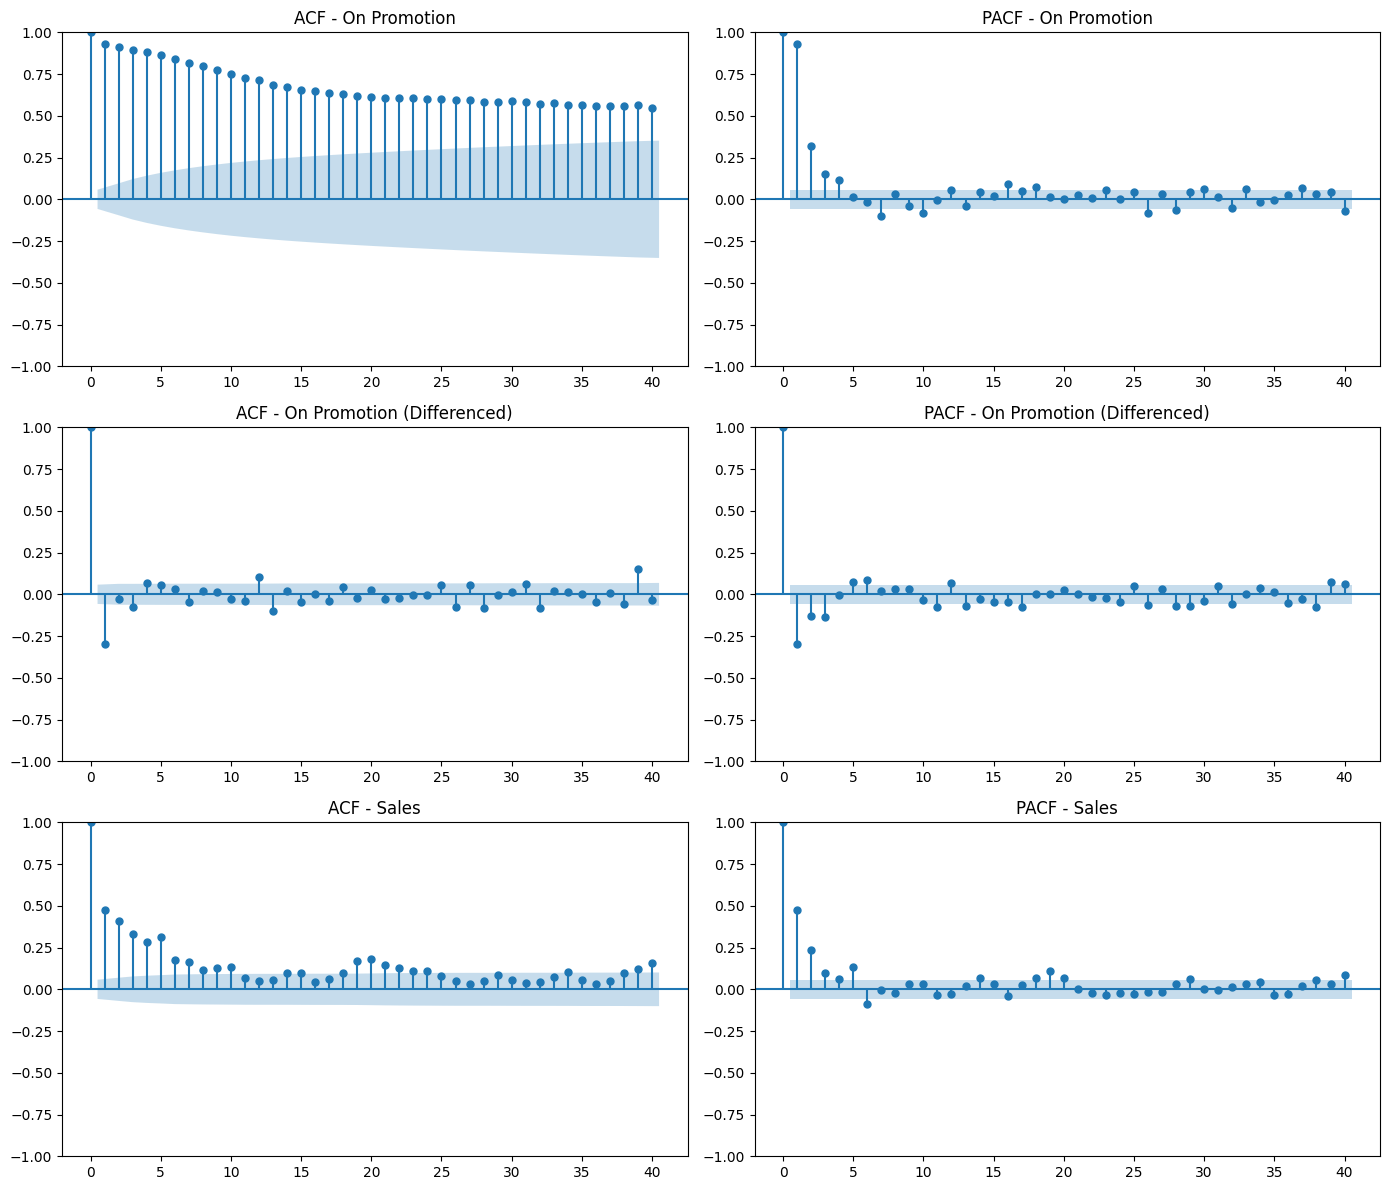

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Pastikan tanggal dalam format datetime
df_cleaning['date'] = pd.to_datetime(df_cleaning['date'])
df_cleaning.set_index('date', inplace=True)

# Lakukan differencing untuk onpromotion
df_cleaning['onpromotion_diff'] = df_cleaning['onpromotion'].diff()

# Drop NaN akibat differencing
df_cleaning.dropna(inplace=True)


fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# ACF & PACF On Promotion (Sebelum Differencing)
plot_acf(df_cleaning['onpromotion'], lags=40, ax=axes[0, 0])
axes[0, 0].set_title("ACF - On Promotion")

plot_pacf(df_cleaning['onpromotion'], lags=40, ax=axes[0, 1])
axes[0, 1].set_title("PACF - On Promotion")

# ACF & PACF On Promotion (Setelah Differencing)
plot_acf(df_cleaning['onpromotion_diff'], lags=40, ax=axes[1, 0])
axes[1, 0].set_title("ACF - On Promotion (Differenced)")

plot_pacf(df_cleaning['onpromotion_diff'], lags=40, ax=axes[1, 1])
axes[1, 1].set_title("PACF - On Promotion (Differenced)")

# ACF & PACF Sales
plot_acf(df_cleaning['sales'], lags=40, ax=axes[2, 0])
axes[2, 0].set_title("ACF - Sales")

plot_pacf(df_cleaning['sales'], lags=40, ax=axes[2, 1])
axes[2, 1].set_title("PACF - Sales")

plt.tight_layout()
plt.show()

### b. Checking Seasonal Pattern (Add variable dummy if there is seasonal pattern)

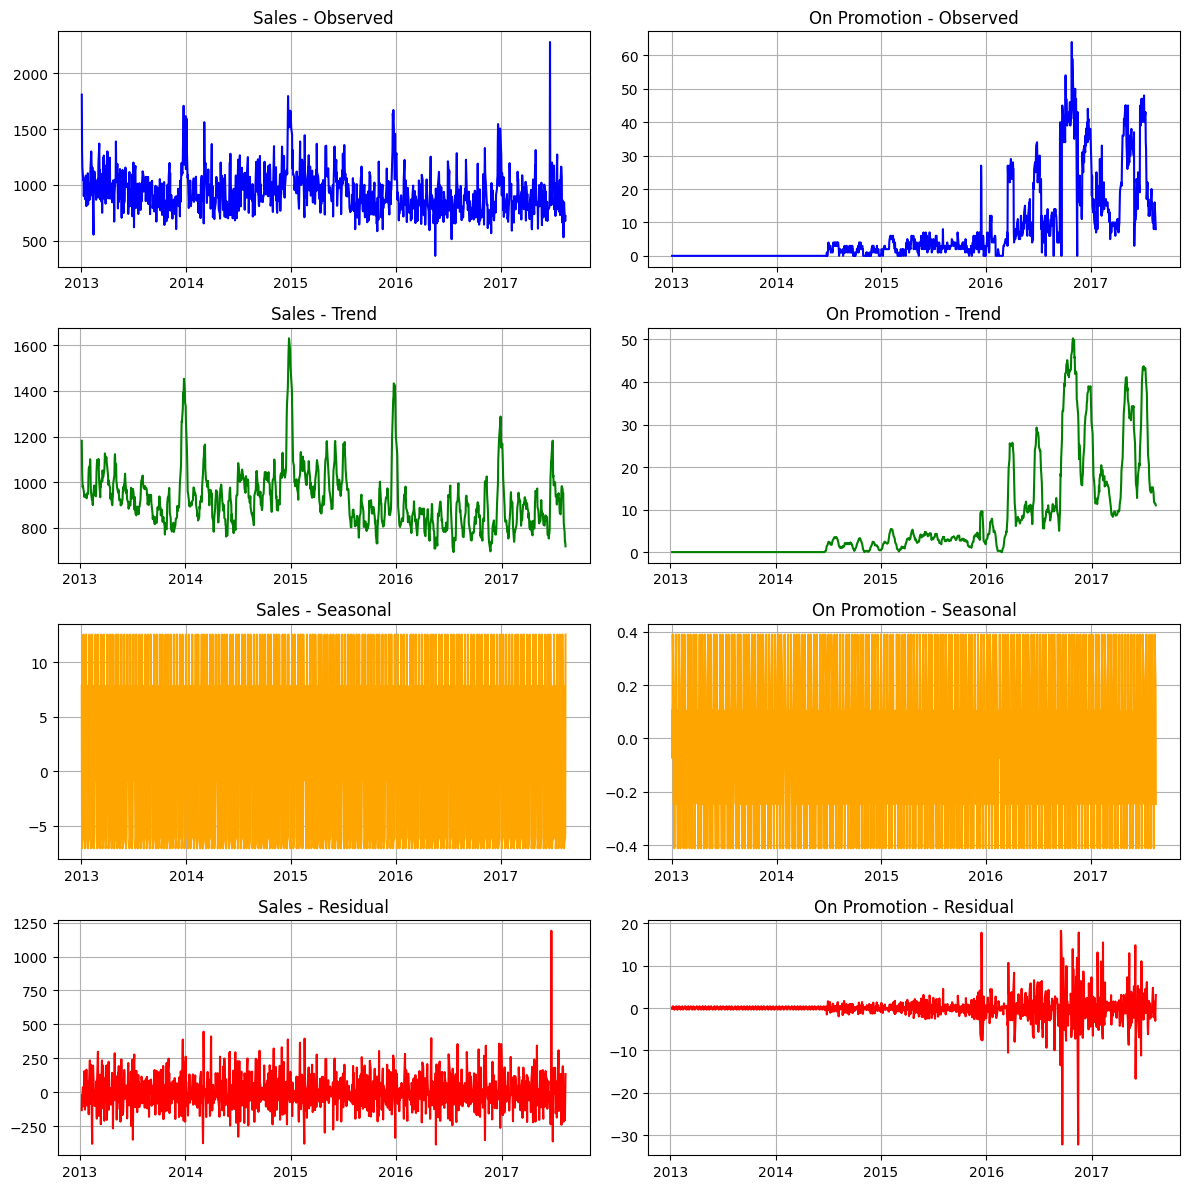

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Sales dan On Promotion
decomp_sales = seasonal_decompose(df_cleaning['sales'], model='additive', period=7)
decomp_onpromo = seasonal_decompose(df_cleaning['onpromotion'], model='additive', period=7)

fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# Warna untuk membedakan setiap plot
colors = ['blue', 'green', 'orange', 'red']

# Sales Decomposition
axes[0, 0].plot(decomp_sales.observed, color=colors[0])
axes[0, 0].set_title("Sales - Observed")
axes[1, 0].plot(decomp_sales.trend, color=colors[1])
axes[1, 0].set_title("Sales - Trend")
axes[2, 0].plot(decomp_sales.seasonal, color=colors[2])
axes[2, 0].set_title("Sales - Seasonal")
axes[3, 0].plot(decomp_sales.resid, color=colors[3])
axes[3, 0].set_title("Sales - Residual")

# On Promotion Decomposition
axes[0, 1].plot(decomp_onpromo.observed, color=colors[0])
axes[0, 1].set_title("On Promotion - Observed")
axes[1, 1].plot(decomp_onpromo.trend, color=colors[1])
axes[1, 1].set_title("On Promotion - Trend")
axes[2, 1].plot(decomp_onpromo.seasonal, color=colors[2])
axes[2, 1].set_title("On Promotion - Seasonal")
axes[3, 1].plot(decomp_onpromo.resid, color=colors[3])
axes[3, 1].set_title("On Promotion - Residual")

# Tambahkan grid untuk memperjelas pola
for ax in axes.flat:
    ax.grid(True)

plt.tight_layout()
plt.show()

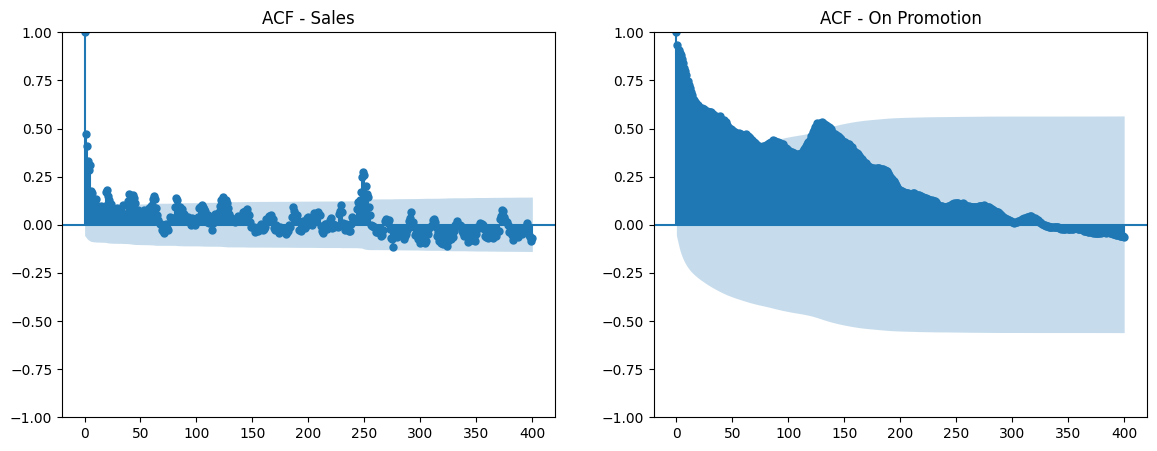

In [58]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF Sales
plot_acf(df_cleaning['sales'], lags=400, ax=axes[0])
axes[0].set_title("ACF - Sales")

# ACF On Promotion
plot_acf(df_cleaning['onpromotion'], lags=400, ax=axes[1])
axes[1].set_title("ACF - On Promotion")

plt.show()

### c. Analisa mendapatkan Top 3 Family by Sales

In [ ]:
#Get Top 3 Family by Sales
get_top3_family = (
    df.groupby('family')['sales']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

print(get_top3_family)

family
GROCERY I    5262681.658
BEVERAGES    2533831.000
CLEANING     1667748.000
Name: sales, dtype: float64


### Modelling

#### CLEANING

In [59]:
# Filter hanya data dengan family "CLEANIGN"
df_cleaning

,store_nbr,family,sales,onpromotion,dcoilwtico,dcoilwtico_interpolate,onpromotion_diff
date,,,,,,,
2013-01-02,5,CLEANING,1810.0,0.0,93.14,93.14,0.0
2013-01-03,5,CLEANING,1305.0,0.0,92.97,92.97,0.0
2013-01-04,5,CLEANING,1159.0,0.0,93.12,93.12,0.0
2013-01-07,5,CLEANING,1043.0,0.0,93.20,93.20,0.0
2013-01-08,5,CLEANING,1062.0,0.0,93.21,93.21,0.0
...,...,...,...,...,...,...,...
2017-08-09,5,CLEANING,687.0,11.0,49.59,49.59,3.0
2017-08-10,5,CLEANING,845.0,14.0,48.54,48.54,3.0
2017-08-11,5,CLEANING,775.0,16.0,48.81,48.81,2.0


In [60]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf

# Hitung ACF untuk sales
acf_values = acf(df_cleaning['sales'], nlags=1100, fft=False)  # Gunakan fft=False untuk akurasi lebih baik

# Buat DataFrame baru untuk hasil ACF tanpa mengubah df_cleaning
acf_df = pd.DataFrame({'Lag': np.arange(len(acf_values)), 'ACF_Sales': acf_values})

# Tentukan jumlah observasi
n = len(df_cleaning['sales'])

# Hitung batas konfidensi 95%
conf_interval = 1.96 / np.sqrt(n)

# Tambahkan kolom untuk batas bawah dan atas
acf_df['Lower_Bound'] = -conf_interval
acf_df['Upper_Bound'] = conf_interval

# Filter hanya untuk lag tahunan (365, 730, 1095)
acf_yearly = acf_df[acf_df['Lag'].isin([365, 730, 1095])]

# Evaluasi apakah nilai ACF signifikan (di luar batas konfidensi)
acf_yearly['Significant'] = (acf_yearly['ACF_Sales'] > acf_yearly['Upper_Bound']) | (acf_yearly['ACF_Sales'] < acf_yearly['Lower_Bound'])

# Tampilkan hasil
acf_yearly

<ipython-input-60-44697f85e3ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acf_yearly['Significant'] = (acf_yearly['ACF_Sales'] > acf_yearly['Upper_Bound']) | (acf_yearly['ACF_Sales'] < acf_yearly['Lower_Bound'])


,Lag,ACF_Sales,Lower_Bound,Upper_Bound,Significant
365,365,-0.068962,-0.057722,0.057722,True
730,730,-0.002112,-0.057722,0.057722,False
1095,1095,0.002191,-0.057722,0.057722,False


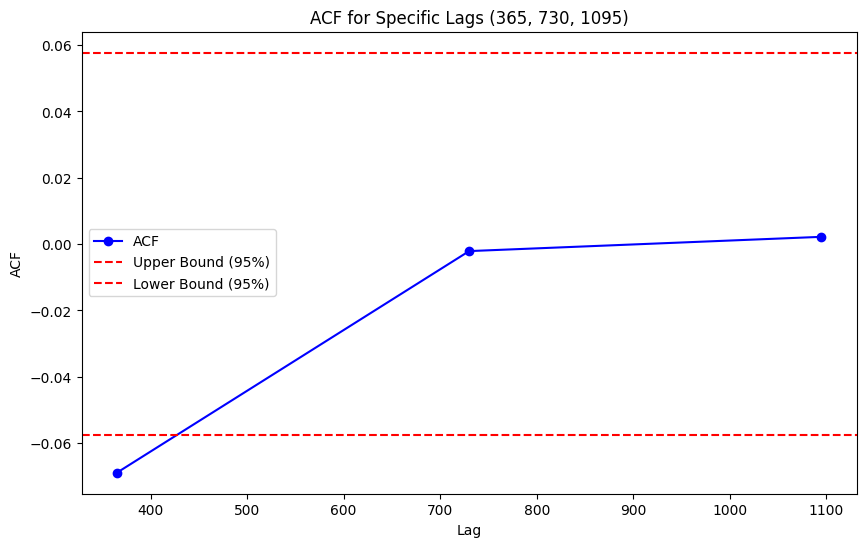

In [62]:
# Filter ACF hanya untuk lag 365, 730, 1095
acf_yearly = acf_df[acf_df['Lag'].isin([365, 730, 1095])]

# Plot ACF untuk lag tersebut
plt.figure(figsize=(10, 6))
plt.plot(acf_yearly['Lag'], acf_yearly['ACF_Sales'], marker='o', color='b', label='ACF')

# Tambahkan garis batas konfidensi
plt.axhline(y=1.96/np.sqrt(n), color='r', linestyle='--', label='Upper Bound (95%)')
plt.axhline(y=-1.96/np.sqrt(n), color='r', linestyle='--', label='Lower Bound (95%)')

# Menambahkan label dan judul
plt.title('ACF for Specific Lags (365, 730, 1095)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.legend()

# Tampilkan chart
plt.show()

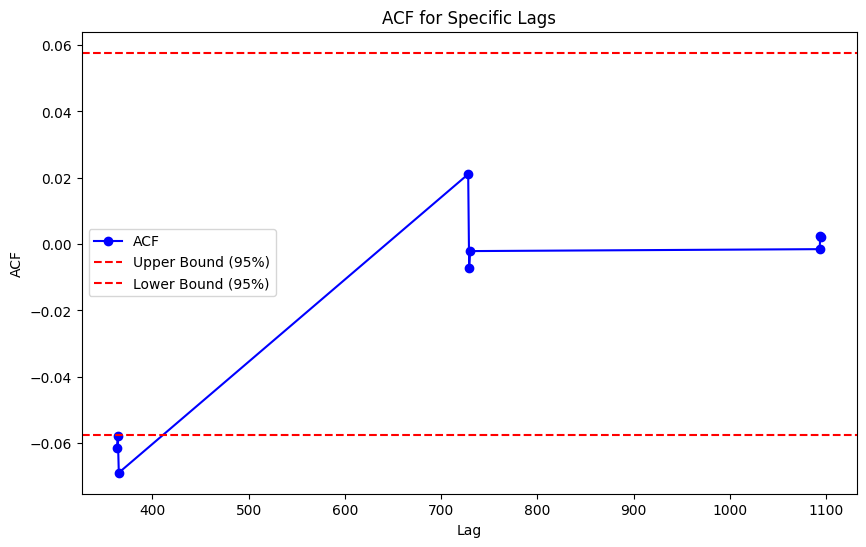

In [63]:
# Filter ACF hanya untuk lag tertentu
acf_somelags = acf_df[acf_df['Lag'].isin([363, 364, 365, 728, 729, 730, 1093, 1094, 1095])]

# Plot ACF untuk lag tersebut
plt.figure(figsize=(10, 6))
plt.plot(acf_somelags['Lag'], acf_somelags['ACF_Sales'], marker='o', color='b', label='ACF')

# Tambahkan garis batas konfidensi
plt.axhline(y=1.96/np.sqrt(n), color='r', linestyle='--', label='Upper Bound (95%)')
plt.axhline(y=-1.96/np.sqrt(n), color='r', linestyle='--', label='Lower Bound (95%)')

# Menambahkan label dan judul
plt.title('ACF for Specific Lags')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.legend()

# Tampilkan chart
plt.show()

In [64]:
df_cleaning

,store_nbr,family,sales,onpromotion,dcoilwtico,dcoilwtico_interpolate,onpromotion_diff
date,,,,,,,
2013-01-02,5,CLEANING,1810.0,0.0,93.14,93.14,0.0
2013-01-03,5,CLEANING,1305.0,0.0,92.97,92.97,0.0
2013-01-04,5,CLEANING,1159.0,0.0,93.12,93.12,0.0
2013-01-07,5,CLEANING,1043.0,0.0,93.20,93.20,0.0
2013-01-08,5,CLEANING,1062.0,0.0,93.21,93.21,0.0
...,...,...,...,...,...,...,...
2017-08-09,5,CLEANING,687.0,11.0,49.59,49.59,3.0
2017-08-10,5,CLEANING,845.0,14.0,48.54,48.54,3.0
2017-08-11,5,CLEANING,775.0,16.0,48.81,48.81,2.0


In [66]:
from scipy.stats import boxcox

# Reset the index to bring back 'date' as a column
df_cleaning = df_cleaning.reset_index()

In [67]:
df_cleaning_new = df_cleaning[['date','store_nbr','family','sales','onpromotion','dcoilwtico_interpolate']]

In [68]:
df_cleaning_new.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico_interpolate
0,2013-01-02,5,CLEANING,1810.0,0.0,93.14
1,2013-01-03,5,CLEANING,1305.0,0.0,92.97
2,2013-01-04,5,CLEANING,1159.0,0.0,93.12
3,2013-01-07,5,CLEANING,1043.0,0.0,93.20
4,2013-01-08,5,CLEANING,1062.0,0.0,93.21


In [69]:
df_cleaning_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1153 non-null   datetime64[ns]
 1   store_nbr               1153 non-null   int64         
 2   family                  1153 non-null   object        
 3   sales                   1153 non-null   float64       
 4   onpromotion             1153 non-null   float64       
 5   dcoilwtico_interpolate  1153 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 54.2+ KB


In [70]:
df_cleaning_new['onpromotion_boxcox'], lambda_bc = boxcox(df_cleaning_new['onpromotion'] + 1)
df_cleaning_new

<ipython-input-70-aede3df980dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaning_new['onpromotion_boxcox'], lambda_bc = boxcox(df_cleaning_new['onpromotion'] + 1)


,date,store_nbr,family,sales,onpromotion,dcoilwtico_interpolate,onpromotion_boxcox
0,2013-01-02,5,CLEANING,1810.0,0.0,93.14,0.000000
1,2013-01-03,5,CLEANING,1305.0,0.0,92.97,0.000000
2,2013-01-04,5,CLEANING,1159.0,0.0,93.12,0.000000
3,2013-01-07,5,CLEANING,1043.0,0.0,93.20,0.000000
4,2013-01-08,5,CLEANING,1062.0,0.0,93.21,0.000000
...,...,...,...,...,...,...,...
1148,2017-08-09,5,CLEANING,687.0,11.0,49.59,1.797228
1149,2017-08-10,5,CLEANING,845.0,14.0,48.54,1.906075
1150,2017-08-11,5,CLEANING,775.0,16.0,48.81,1.964251
1151,2017-08-14,5,CLEANING,676.0,10.0,47.59,1.752931


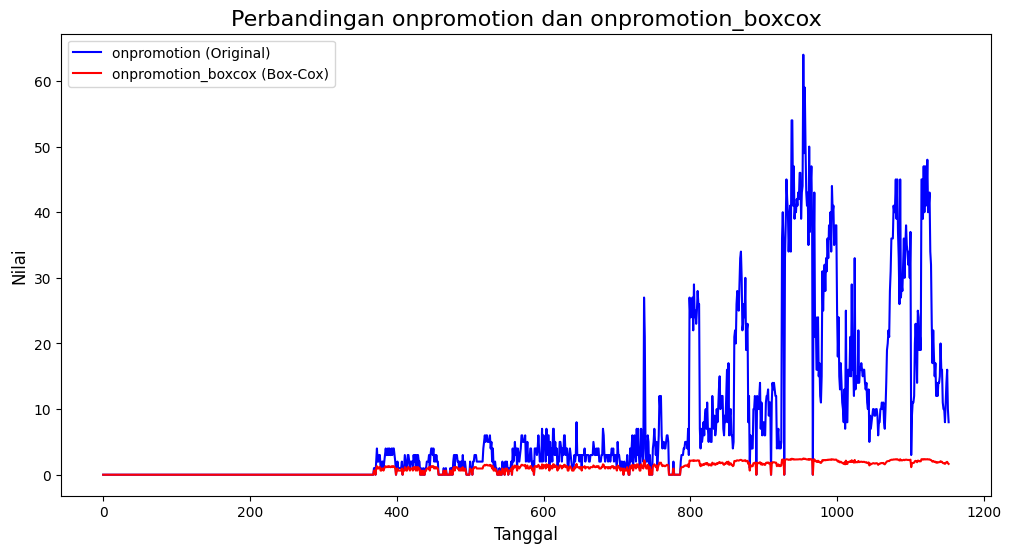

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot 'onpromotion' (data asli)
plt.plot(df_cleaning_new.index, df_cleaning_new['onpromotion'], label='onpromotion (Original)', color='blue')

# Plot 'onpromotion_boxcox' (setelah Box-Cox)
plt.plot(df_cleaning_new.index, df_cleaning_new['onpromotion_boxcox'], label='onpromotion_boxcox (Box-Cox)', color='red')

# Menambahkan label dan judul
plt.title('Perbandingan onpromotion dan onpromotion_boxcox', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

##### - Modelling Using VARMAX

In [72]:
# ceka tipe kolom date, pastikan sudah datetime
print(df_cleaning_new['date'].dtype)

datetime64[ns]


In [73]:
# Set kolom tanggal sebagai indeks
df_cleaning_new.set_index('date', inplace=True)

In [74]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_absolute_error

# Pisahkan variabel endogen dan eksogen
endog = df_cleaning_new[['sales', 'onpromotion_boxcox']]
exog = df_cleaning_new[['dcoilwtico_interpolate']]

# Pisahkan data menjadi train dan test
train_size = int(len(df_cleaning_new) * 0.8)
train_endog, test_endog = endog.iloc[:train_size], endog.iloc[train_size:]
train_exog, test_exog = exog.iloc[:train_size], exog.iloc[train_size:]

In [95]:
train_endog.head(3)

,sales,onpromotion_boxcox
date,,
2013-01-02,1810.0,0.0
2013-01-03,1305.0,0.0
2013-01-04,1159.0,0.0


In [96]:
test_endog.head(3)

,sales,onpromotion_boxcox,onpromotion
date,,,
2016-09-12,940.0,1.412922,5.0
2016-09-13,763.0,1.298991,4.0
2016-09-14,731.0,1.412922,5.0


In [77]:
train_exog

,dcoilwtico_interpolate
date,
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
2013-01-08,93.21
...,...
2016-09-02,44.39
2016-09-06,44.85
2016-09-07,45.47


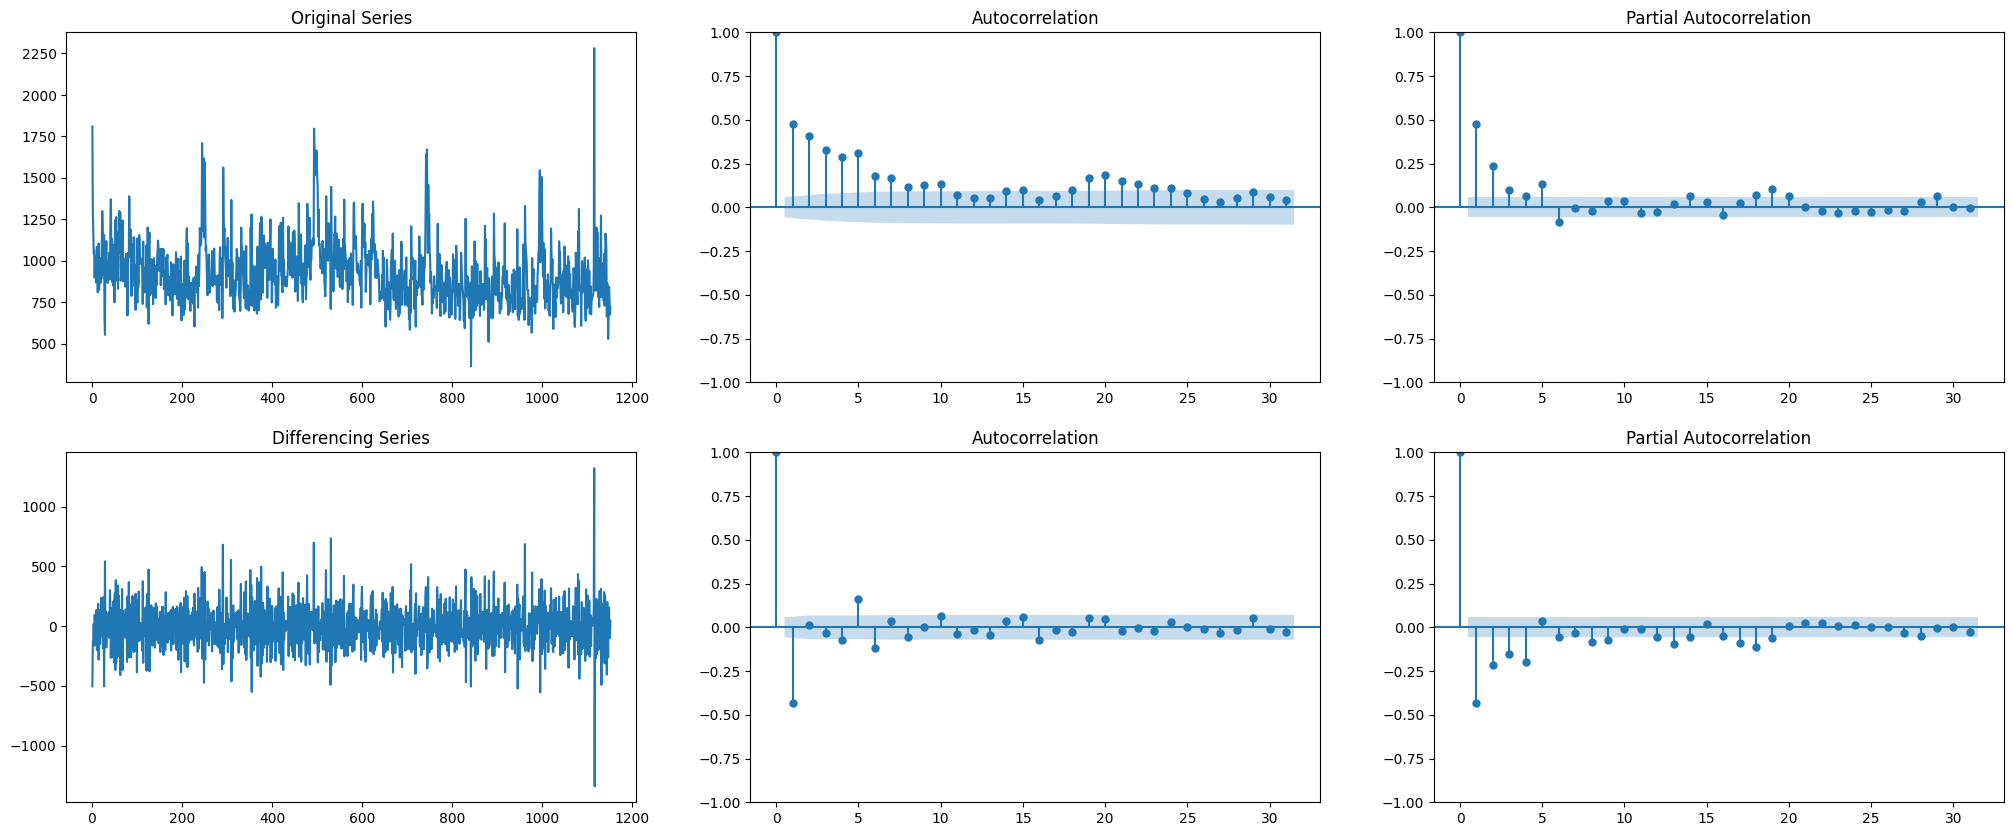

In [78]:
# Plot ACF dan PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

ax[0, 0].set_title('Original Series')
ax[0, 0].plot(df_cleaning['sales'])
ax[0, 1] = plot_acf(df_cleaning['sales'], ax=ax[0, 1])
ax[0, 2] = plot_pacf(df_cleaning['sales'], ax=ax[0, 2])


ax[1, 0].set_title('Differencing Series')
ax[1, 0].plot(df_cleaning['sales'].diff().dropna())
ax[1, 1] = plot_acf(df_cleaning['sales'].diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_pacf(df_cleaning['sales'].diff().dropna(), ax=ax[1, 2])

plt.show()

Hasil: berdasarkan Plot PACF, nilai P=1 sampai 5. berdasarkan plot ACF, nilai Q=1 sampai 5 yg layak dicoba .

In [83]:
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.special import inv_boxcox  # Perbaiki impor di sini
from scipy.stats import boxcox

# Grid search untuk parameter p dan q
p_values = range(1, 5)  # Order autoregressive berdasarkan plot PACF
q_values = range(1, 5)  # Order moving average berdasarkan plot ACF
best_score = float("inf")
best_cfg = None
best_model = None

# Hitung rata-rata aktual untuk normalisasi
mean_sales = test_endog['sales'].mean()
mean_promo = test_endog['onpromotion_boxcox'].mean()

# Coba semua kombinasi (p, q)
for p, q in itertools.product(p_values, q_values):
    try:
        print(f"Evaluating VARMAX({p},{q})...")

        # Train model VARMAX
        model = VARMAX(train_endog, exog=train_exog, order=(p, q), trend='c')
        model_fit = model.fit(disp=False)

        # Forecast untuk data test
        preds = model_fit.forecast(steps=len(test_endog), exog=test_exog)

        # Kembalikan prediksi 'onpromotion' ke skala data awal
        preds['onpromotion'] = inv_boxcox(preds['onpromotion_boxcox'], lambda_bc) - 1  # Mengurangi 1 kembali
        test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga

        # Hitung MAE antara prediksi dan data aktual
        mae_sales = mean_absolute_error(test_endog['sales'], preds['sales'])
        mae_promo = mean_absolute_error(test_endog['onpromotion'], preds['onpromotion'])

        # Normalisasi MAE
        mae_sales_norm = mae_sales / mean_sales
        mae_promo_norm = mae_promo / mean_promo
        mae_normalized = mae_sales_norm + mae_promo_norm  # Gabungkan kesalahan yang telah dinormalisasi


        # Hirung RMSE antara data prediksi dengan data aktual
        rmse_sales = np.sqrt(mean_squared_error(test_endog['sales'], preds['sales']))
        rmse_promo = np.sqrt(mean_squared_error(test_endog['onpromotion'], preds['onpromotion']))

         # Normalisasi RMSE
        rmse_sales_norm = rmse_sales / mean_sales
        rmse_promo_norm = rmse_promo / mean_promo
        rmse_normalized = rmse_sales_norm + rmse_promo_norm  # Gabungkan kesalahan yang telah dinormalisasi

        print(f"VARMAX({p},{q}) - Normalized MAE: {mae_normalized:.4f}, dengan Normalized RMSE : {rmse_normalized}")

        # Simpan model dengan MAE terbaik
        if rmse_normalized < best_score:
            best_score = rmse_normalized
            best_cfg = (p, q)
            best_model = model_fit

    except Exception as e:
        print(f"VARMAX({p},{q}) gagal dilatih: {e}")

print(f"\nBest VARMAX order: {best_cfg} dengan Normalized MAE: {best_score:.4f} dengan Normalized RMSE : {rmse_normalized}")


'''
rmse_sales = np.sqrt(mean_squared_error(test_endog['sales'], preds['sales']))
rmse_promo = np.sqrt(mean_squared_error(test_endog['onpromotion'], preds['onpromotion']))
'''

Evaluating VARMAX(1,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_i

VARMAX(1,1) - Normalized MAE: 11.1735, dengan Normalized RMSE : 13.114137496318254
Evaluating VARMAX(1,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local

VARMAX(1,2) - Normalized MAE: 11.1876, dengan Normalized RMSE : 13.12751981153324
Evaluating VARMAX(1,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local

VARMAX(1,3) - Normalized MAE: 11.0838, dengan Normalized RMSE : 13.032485315497107
Evaluating VARMAX(1,4)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local

VARMAX(1,4) - Normalized MAE: 11.1213, dengan Normalized RMSE : 13.066159263936449
Evaluating VARMAX(2,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local

VARMAX(2,1) - Normalized MAE: 11.0964, dengan Normalized RMSE : 13.036662121781884
Evaluating VARMAX(2,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q

VARMAX(2,2) - Normalized MAE: 11.0575, dengan Normalized RMSE : 13.000862746637019
Evaluating VARMAX(2,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local

VARMAX(2,3) - Normalized MAE: 10.9458, dengan Normalized RMSE : 12.896509258482025
Evaluating VARMAX(2,4)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q

VARMAX(2,4) - Normalized MAE: 11.0645, dengan Normalized RMSE : 13.005988333951976
Evaluating VARMAX(3,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q

VARMAX(3,1) - Normalized MAE: 11.0925, dengan Normalized RMSE : 13.023566143700004
Evaluating VARMAX(3,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q

VARMAX(3,2) - Normalized MAE: 11.1290, dengan Normalized RMSE : 13.055492254344244
Evaluating VARMAX(3,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q

VARMAX(3,3) - Normalized MAE: 11.0382, dengan Normalized RMSE : 12.975977807911715
Evaluating VARMAX(3,4)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q

VARMAX(3,4) - Normalized MAE: 11.0146, dengan Normalized RMSE : 12.95363722368721
Evaluating VARMAX(4,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q

VARMAX(4,1) - Normalized MAE: 10.9763, dengan Normalized RMSE : 12.911163506659591
Evaluating VARMAX(4,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q

VARMAX(4,2) - Normalized MAE: 11.1112, dengan Normalized RMSE : 13.030709734267024
Evaluating VARMAX(4,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q

VARMAX(4,3) - Normalized MAE: 11.1139, dengan Normalized RMSE : 13.032827108922941
Evaluating VARMAX(4,4)...
VARMAX(4,4) - Normalized MAE: 10.9156, dengan Normalized RMSE : 12.854683782975057

Best VARMAX order: (4, 4) dengan Normalized MAE: 12.8547 dengan Normalized RMSE : 12.854683782975057


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q

"\nrmse_sales = np.sqrt(mean_squared_error(test_endog['sales'], preds['sales'])) \nrmse_promo = np.sqrt(mean_squared_error(test_endog['onpromotion'], preds['onpromotion']))\n"

In [90]:
# Gunakan model terbaik untuk prediksi
test_preds = best_model.forecast(steps=len(test_endog), exog=test_exog)

# Kembalikan prediksi 'onpromotion' ke skala data awal untuk visualisasi
test_preds['onpromotion'] = inv_boxcox(test_preds['onpromotion_boxcox'], lambda_bc) - 1

test_preds.head(3)



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q

,sales,onpromotion_boxcox,onpromotion
922,847.652265,1.417389,5.044190
923,858.711018,1.415995,5.030357
924,872.913634,1.451701,5.397925


In [89]:
print(f"\nBest VARMAX order: {best_cfg} dengan Normalized MAE taining: {best_score:.4f} dengan Normalized RMSE taining : {rmse_normalized}")



Best VARMAX order: (4, 4) dengan Normalized MAE taining: 12.8547 dengan Normalized RMSE taining : 12.854683782975057


In [94]:
# Hirung RMSE antara data prediksi dengan data aktual
rmse_sales = np.sqrt(mean_squared_error(test_endog['sales'], test_preds['sales']))
rmse_promo = np.sqrt(mean_squared_error(test_endog['onpromotion'], test_preds['onpromotion']))

 # Normalisasi RMSE
rmse_sales_norm = rmse_sales / mean_sales
rmse_promo_norm = rmse_promo / mean_promo
rmse_normalized = rmse_sales_norm + rmse_promo_norm  # Gabungkan kesalahan yang telah dinormalisasi


print(f"Normalized RMSE for Sales: {rmse_sales_norm:.4f}")
print(f"Normalized RMSE for Onpromotion: {rmse_promo_norm:.4f}")
print(f"Total Normalized RMSE: {rmse_normalized:.4f}")

Normalized RMSE for Sales: 0.2227
Normalized RMSE for Onpromotion: 12.6319
Total Normalized RMSE: 12.8547


In [ ]:
# Hirung RMSE antara data prediksi dengan data aktual
rmse_sales = np.sqrt(mean_squared_error(test_endog['sales'], test_preds['sales']))
rmse_promo = np.sqrt(mean_squared_error(test_endog['onpromotion'], test_preds['onpromotion']))

 # Normalisasi RMSE
rmse_sales_norm = rmse_sales / mean_sales
rmse_promo_norm = rmse_promo / mean_promo
rmse_normalized = rmse_sales_norm + rmse_promo_norm  # Gabungkan kesalahan yang telah dinormalisasi

print(f"Normalized RMSE for Sales: {rmse_sales_norm:.4f}")
print(f"Normalized RMSE for Onpromotion: {rmse_promo_norm:.4f}")
print(f"Total Normalized RMSE: {rmse_normalized:.4f}")

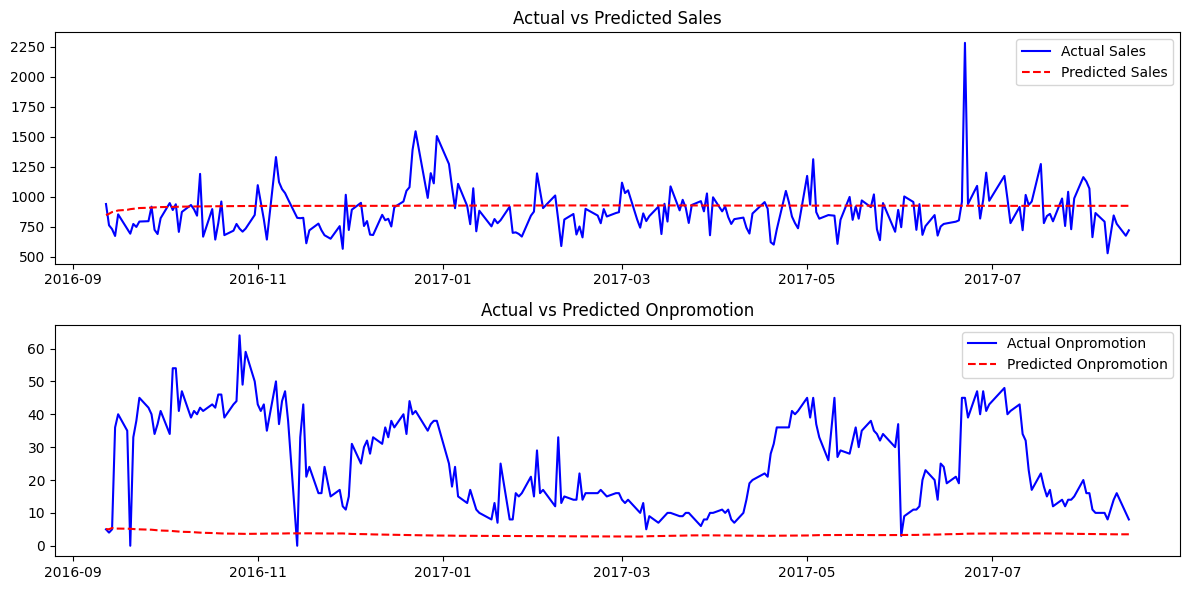

In [85]:
# Plot hasil prediksi vs actual
plt.figure(figsize=(12, 6))

# Plot Sales
plt.subplot(2, 1, 1)
plt.plot(test_endog.index, test_endog['sales'], label='Actual Sales', color='blue')
plt.plot(test_endog.index, test_preds['sales'], label='Predicted Sales', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Sales')
plt.legend()

# Plot Onpromotion (sudah dalam skala asli)
plt.subplot(2, 1, 2)
plt.plot(test_endog.index, test_endog['onpromotion'], label='Actual Onpromotion', color='blue')
plt.plot(test_endog.index, test_preds['onpromotion'], label='Predicted Onpromotion', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Onpromotion')
plt.legend()

plt.tight_layout()
plt.show()





##### - Modelling Using LSTM

In [97]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import time
from sklearn.metrics import mean_squared_error

# Preprocessing
scaler_endog = MinMaxScaler()
scaler_exog = MinMaxScaler()

# Scaling the data (already done earlier)
endog_scaled = scaler_endog.fit_transform(endog)
exog_scaled = scaler_exog.fit_transform(exog)

In [98]:
# Check the shape of the endog_scaled (should have 2 columns)
print(f"endog_scaled shape: {endog_scaled.shape}")

endog_scaled shape: (1153, 2)


In [99]:
# Ensure endog_scaled has 2 columns (sales and onpromotion)
print(f"endog_scaled shape: {endog_scaled.shape}")  # (1688, 2)

# Combine exogenous (exog) and endogenous (endog) features into x
x = np.concatenate([exog_scaled, endog_scaled], axis=1)

# The target variable 'y' is the endog_scaled
y = endog_scaled  # 'sales' and 'onpromotion' as the target (2 columns)

endog_scaled shape: (1153, 2)


In [100]:
def load_data(X, seq_len, train_size=0.9):
    amount_of_features = X.shape[1]
    X_mat = X
    sequence_length = seq_len + 1
    data = []

    for index in range(len(X_mat) - sequence_length):
        data.append(X_mat[index: index + sequence_length])

    data = np.array(data)
    train_split = int(round(train_size * data.shape[0]))
    train_data = data[:train_split, :]

    x_train = train_data[:, :-1]
    y_train = train_data[:, -1, 1:]  # Select only the last 2 columns (sales and onpromotion)

    x_test = data[train_split:, :-1]
    y_test = data[train_split:, -1, 1:]  # Select only the last 2 columns (sales and onpromotion)

    # Check shapes before reshaping
    print(f"x_train shape (before reshape): {x_train.shape}")
    print(f"y_train shape (before reshape): {y_train.shape}")

    # Make sure y_train and y_test have 2 columns (for 'sales' and 'onpromotion')
    assert y_train.shape[1] == 2, "y_train should have 2 columns (sales and onpromotion)"
    assert y_test.shape[1] == 2, "y_test should have 2 columns (sales and onpromotion)"

    # Reshape x_train and x_test to 3D arrays for LSTM input
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return x_train, y_train, x_test, y_test

# Setting window size
window = 22
X_train, y_train, X_test, y_test = load_data(x, window)

# Print the shapes of data after loading and reshaping
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

x_train shape (before reshape): (1017, 22, 3)
y_train shape (before reshape): (1017, 2)
X_train shape: (1017, 22, 3), y_train shape: (1017, 2)
X_test shape: (113, 22, 3), y_test shape: (113, 2)


In [101]:
# LSTM Model
model = Sequential()
model.add(LSTM(units=50, input_shape=(window, X_train.shape[2])))
model.add(Dropout(0.2))

# Output layer with 2 units for 'sales' and 'onpromotion'
model.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(units=2, kernel_initializer='uniform', activation='linear'))  # Two outputs

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
start = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=35, validation_split=0.05, verbose=1)
print('Compilation time: ', time.time() - start)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1153 - val_loss: 0.0513
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0240 - val_loss: 0.0127
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0160 - val_loss: 0.0096
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0145 - val_loss: 0.0131
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0149 - val_loss: 0.0084
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0136 - val_loss: 0.0107
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0139 - val_loss: 0.0085
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0140 - val_loss: 0.0090
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0121 - val_loss: 0.0104
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0107 - val_loss: 0.0079
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0124 - val_loss: 0.0086
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

In [102]:
# Predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Inverse transform to get the actual values
trainPredict = scaler_endog.inverse_transform(trainPredict)
trainY = scaler_endog.inverse_transform(y_train)
testPredict = scaler_endog.inverse_transform(testPredict)
testY = scaler_endog.inverse_transform(y_test)

# Plotting
plot_predicted_sales = testPredict[:, 0].reshape(-1, 1)
plot_predicted_onpromotion = testPredict[:, 1].reshape(-1, 1)

plot_actual_sales = testY[:, 0].reshape(-1, 1)
plot_actual_onpromotion = testY[:, 1].reshape(-1, 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [103]:
# Print shapes for verification
print(f"Plot actual sales shape: {plot_actual_sales.shape}")
print(f"Plot predicted sales shape: {plot_predicted_sales.shape}")

Plot actual sales shape: (113, 1)
Plot predicted sales shape: (113, 1)


In [104]:
# Calculate RMSE for both sales and onpromotion
trainScore_sales = mean_squared_error(trainY[:, 0], trainPredict[:, 0]) ** 0.5
testScore_sales = mean_squared_error(testY[:, 0], plot_predicted_sales[:, 0]) ** 0.5

trainScore_onpromotion = mean_squared_error(trainY[:, 1], trainPredict[:, 1]) ** 0.5
testScore_onpromotion = mean_squared_error(testY[:, 1], plot_predicted_onpromotion[:, 0]) ** 0.5

In [105]:
print(f'Train Score for sales: {trainScore_sales:.2f} RMSE')
print(f'Test Score for sales: {testScore_sales:.2f} RMSE')

print(f'Train Score for onpromotion: {trainScore_onpromotion:.2f} RMSE')
print(f'Test Score for onpromotion: {testScore_onpromotion:.2f} RMSE')

Train Score for sales: 151.59 RMSE
Test Score for sales: 200.01 RMSE
Train Score for onpromotion: 0.29 RMSE
Test Score for onpromotion: 0.27 RMSE


In [110]:
# Normalized RMSE test

rmse_sales_norm_LSTM = np.sqrt(testScore_sales) / mean_sales
rmse_promo_norm_LSTM = np.sqrt(testScore_onpromotion) / mean_promo
rmse_normalized_LSTM = rmse_sales_norm_LSTM + rmse_promo_norm_LSTM

print(f"Normalized RMSE for Sales: {rmse_sales_norm_LSTM:.4f}")
print(f"Normalized RMSE for Onpromotion: {rmse_promo_norm_LSTM:.4f}")
print(f"Total Normalized RMSE test: {rmse_normalized_LSTM:.4f}")

Normalized RMSE for Sales: 0.0162
Normalized RMSE for Onpromotion: 0.2543
Total Normalized RMSE test: 0.2705


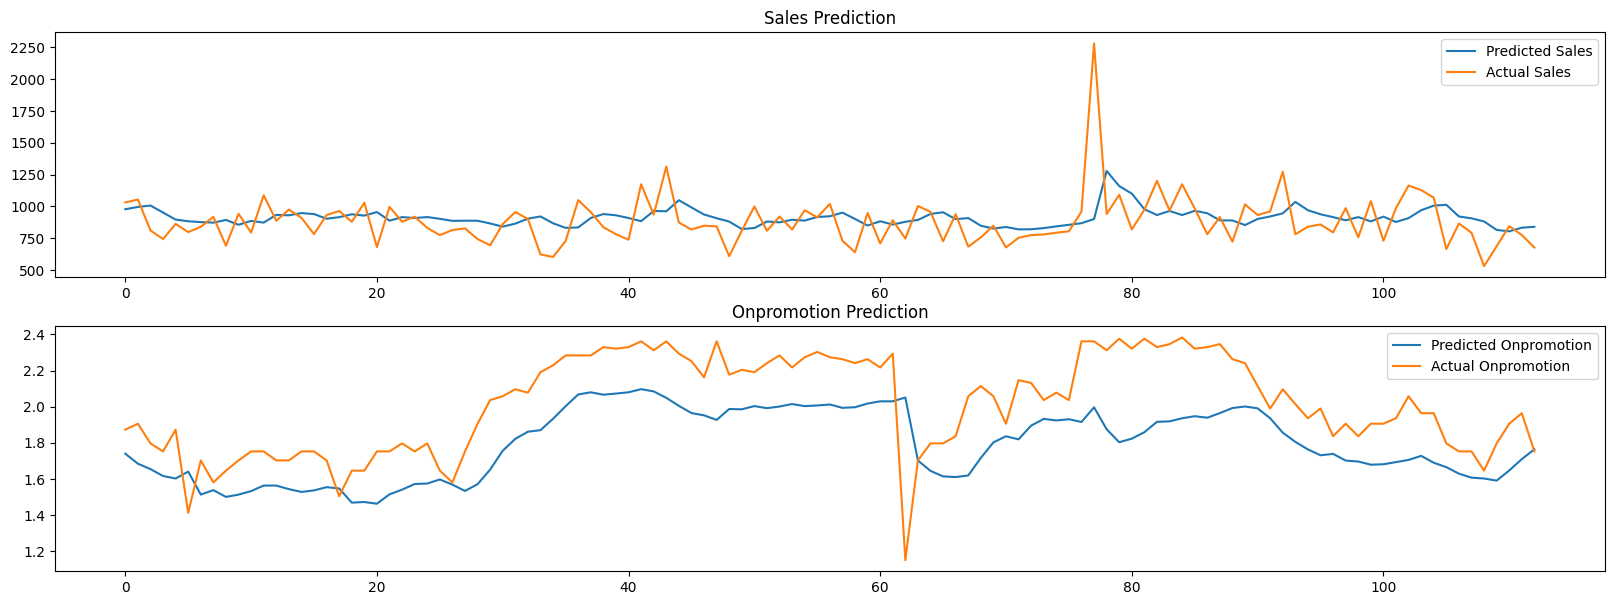

In [106]:
# Plot the results for both targets
plt.figure(figsize=(20, 7))

# Sales plot
plt.subplot(2, 1, 1)
plt.plot(pd.DataFrame(plot_predicted_sales), label='Predicted Sales')
plt.plot(pd.DataFrame(plot_actual_sales), label='Actual Sales')
plt.legend(loc='best')
plt.title('Sales Prediction')

# Onpromotion plot
plt.subplot(2, 1, 2)
plt.plot(pd.DataFrame(plot_predicted_onpromotion), label='Predicted Onpromotion')
plt.plot(pd.DataFrame(plot_actual_onpromotion), label='Actual Onpromotion')
plt.legend(loc='best')
plt.title('Onpromotion Prediction')

plt.show()

# Kesimpulan

LSTM lebih baik dalam memprediksi
dengan hasil RMSE LSTM

*   Normalized RMSE for Sales: 0.0162
*   Normalized RMSE for Onpromotion: 0.2543
* Total Normalized RMSE test: 0.2705


dibandingkan hasil VARMAX(4.4)
* Normalized RMSE for Sales: 0.2227
* Normalized RMSE for Onpromotion: 12.6319
* Total Normalized RMSE: 12.8547